# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import datetime
from datetime import time
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Set display max column or text in DataFrame
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", -1)

In [3]:
tweet_csv = pd.read_csv('twitter-archive-enhanced.csv')
tweet_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
predicted_breeds_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predicted_breeds_url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
# Import predicted breeds file
tweet_tsv = pd.read_csv("image_predictions.tsv", sep='\t')

In [5]:
tweet_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'XXXXX'
# consumer_secret = 'XXXX'
# access_token = 'XXXX'
# access_secret = 'XXXXX'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = tweet_csv.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e            
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [7]:
# len(fails_dict)

**31 tweet_id have not when call api tweet**

In [8]:
tweet_json = pd.read_json('tweet_json.txt', lines = True)
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",33586,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6947,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9397542, 'friends_count': 21, 'listed_count': 7732, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 148426, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 16635, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1576252749800386560/fhEuI2BO_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1576252749800386560/fhEuI2BO_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1661991479', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none', 'withheld_in_countries': []}"
1,NaN,NaN,2017-08-01 00:17:27

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 1. twitter-archive-enhanced.csv
### Data Frame: tweet_csv

In [9]:
tweet_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [10]:
tweet_csv.shape

(2356, 17)

In [11]:
tweet_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
tweet_csv.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [13]:
tweet_csv[tweet_csv['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [14]:
tweet_csv.nunique()

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [15]:
tweet_csv.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
tweet_csv.dtypes

tweet_id                      int64  
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
dtype: object

In [17]:
# Get column type is number
columns = []
for key, column in tweet_csv.dtypes.items():
    if column == "int64" or column == "float64":
        columns.append(key)
list(columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'rating_numerator',
 'rating_denominator']

In [18]:
# Check value in column <= 0
(tweet_csv[list(columns)] <= 0).sum()

tweet_id                    0
in_reply_to_status_id       0
in_reply_to_user_id         0
retweeted_status_id         0
retweeted_status_user_id    0
rating_numerator            2
rating_denominator          1
dtype: int64

In [19]:
# Show record has value <= 0
tweet_csv.query('rating_numerator <= 0 or rating_denominator <= 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [20]:
# Check value column name
tweet_csv.name.value_counts()

None            745
a               55 
Charlie         12 
Lucy            11 
Oliver          11 
Cooper          11 
Tucker          10 
Lola            10 
Penny           10 
Bo              9  
Winston         9  
the             8  
Sadie           8  
Toby            7  
Buddy           7  
an              7  
Daisy           7  
Bailey          7  
Stanley         6  
Dave            6  
Bella           6  
Jack            6  
Leo             6  
Oscar           6  
Milo            6  
Jax             6  
Rusty           6  
Koda            6  
Scout           6  
very            5  
               ..  
Yoda            1  
Schnitzel       1  
Jonah           1  
Carper          1  
Anna            1  
Moofasa         1  
Jangle          1  
Hector          1  
Amélie          1  
Dwight          1  
Tommy           1  
Noosh           1  
Staniel         1  
Wafer           1  
Furzey          1  
Godi            1  
Trigger         1  
Jaycob          1  
DonDon          1  


In [21]:
# Dog name lower case
tweet_csv[tweet_csv['name'].str.islower()].name.value_counts()

a               55
the             8 
an              7 
very            5 
just            4 
quite           4 
one             4 
not             2 
mad             2 
getting         2 
actually        2 
all             1 
his             1 
incredibly      1 
such            1 
space           1 
this            1 
unacceptable    1 
by              1 
infuriating     1 
old             1 
life            1 
light           1 
my              1 
officially      1 
Name: name, dtype: int64

In [22]:
# Check column expanded_urls
len_url = len(tweet_csv.expanded_urls[0])
# tweet_csv.expanded_urls.str.len
tweet_csv[tweet_csv.expanded_urls.str.len() < len_url].expanded_urls

35      https://twitter.com/4bonds2carbon/status/885517367337512960
42      https://twitter.com/kaijohnson_19/status/883965650754039809
72      https://twitter.com/bbcworld/status/878599868507402241     
83      https://twitter.com/mpstowerham/status/876162994446753793  
88      https://twitter.com/drboondoc/status/874413398133547008    
110     https://twitter.com/animalcog/status/871075758080503809    
133     https://twitter.com/nbcnews/status/866458718883467265      
190     https://twitter.com/perfy/status/855857318168150016        
192     https://twitter.com/markhalperin/status/855656431005061120 
241     https://twitter.com/shomaristone/status/846484798663245829 
243     https://twitter.com/csncapitals/status/846088479142531073  
256     https://twitter.com/brianstack153/status/796796054100471809
269     https://twitter.com/abc/status/841311395547250688          
283     https://twitter.com/ktla/status/838948714227998720         
310     https://vine.co/v/5W2Dg3XPX7a,https://vi

In [23]:
# Check text start with = RT @
print(tweet_csv[tweet_csv['text'].str.contains('RT @')].text.shape)
tweet_csv[tweet_csv['text'].str.contains('RT @')].text

(181,)


19      RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX    
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo                                                                                            
36      RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5         
68      RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…  
73      RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…
74      RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…  
78      RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his n

### 2. image_predictions.tsv
### DataFrame: tweet_tsv

In [24]:
tweet_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
tweet_tsv.shape

(2075, 12)

In [26]:
tweet_tsv.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [27]:
tweet_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
tweet_tsv.nunique()

tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64

In [29]:
tweet_tsv.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
# Check id duplicate
tweet_tsv[tweet_tsv.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [31]:
# Get column have type is number
columns = []
for key, column in tweet_tsv.dtypes.items():
    if column == "int64" or column == "float64":
        columns.append(key)
list(columns)

['tweet_id', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf']

In [32]:
# Check value column <= 0
(tweet_tsv[list(columns)] <= 0).sum()

tweet_id    0
img_num     0
p1_conf     0
p2_conf     0
p3_conf     0
dtype: int64

In [33]:
# Probability that all 3 algorithms have the same prediction
# Is Dog True/False
tweet_tsv.query('p1_dog == p2_dog == p3_dog').shape[0]/tweet_tsv.shape[0]

0.7551807228915662

### 3. tweet_json.txt
### Data Frame: tweet_json

In [34]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",33586,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6947,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9397542, 'friends_count': 21, 'listed_count': 7732, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 148426, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 16635, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1576252749800386560/fhEuI2BO_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1576252749800386560/fhEuI2BO_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1661991479', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none', 'withheld_in_countries': []}"
1,NaN,NaN,2017-08-01 00:17:27

In [35]:
tweet_json.shape

(2325, 32)

In [36]:
tweet_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [37]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2325 non-null datetime64[ns]
display_text_range               2325 non-null object
entities                         2325 non-null object
extended_entities                2055 non-null object
favorite_count                   2325 non-null int64
favorited                        2325 non-null bool
full_text                        2325 non-null object
geo                              0 non-null float64
id                               2325 non-null int64
id_str                           2325 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [38]:
# Sum value null
tweet_json.isnull().sum()

contributors                     2325
coordinates                      2325
created_at                       0   
display_text_range               0   
entities                         0   
extended_entities                270 
favorite_count                   0   
favorited                        0   
full_text                        0   
geo                              2325
id                               0   
id_str                           0   
in_reply_to_screen_name          2248
in_reply_to_status_id            2248
in_reply_to_status_id_str        2248
in_reply_to_user_id              2248
in_reply_to_user_id_str          2248
is_quote_status                  0   
lang                             0   
place                            2324
possibly_sensitive               132 
possibly_sensitive_appealable    132 
quoted_status                    2301
quoted_status_id                 2299
quoted_status_id_str             2299
quoted_status_permalink          2299
retweet_coun

In [39]:
# In dataset have 2 column id and id_str, have value id != id_str
# I will default column id is tweet_id
# Check id duplicated
tweet_json[tweet_json.id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [40]:
# Why value id != id_str?
# id_str show for what?
tweet_json[tweet_json.id != tweet_json.id_str.astype(int)].shape

(825, 32)

### Quality issues:
### Issue1: Dirty data
1. **Columns contain a lot value null.**<br>
in_reply_to_status_id(2278)<br>
in_reply_to_user_id(2278)<br>
retweeted_status_id(2175)<br>
retweeted_status_user_id(2175)<br>
retweeted_status_timestamp(2175)<br>
... etc
2. **Value doesn't make sense mathematically.**<br>
rating_numerator <= 0 count 2<br>
rating_denominator <= 0 count 1<br>
3. **Name dog is no meaning: a, an, the, this...**<br>
4. **Value column should is NaN instead of None**<br>
name	
doggo	
floofer	
pupper	
puppo<br>
...<br>
5. **Type must be of datetime instead of the object**<br>
time_stamp<br>
retweeted_status_timestamp
6. **Probability that all 3 algorithms have the same prediction**<br>
0.75 <=> 75%<br>
7. **In dataset have 2 columns is id and id_str and 825 record id != id_str**<br>
8. **Columns not working because all value is null**<br>
contributors<br>
coordinates<br>
geo<br>
place<br>
9. **Column name p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog is no meaning**
10. **Strange url in column expanded_urls:**<br>
https://vine.co/v/5gKxeUpuKEr,https://vine.co/v/5gKxeUpuKEr



### Lack of tidiness
### Issue2: Tidiness data

**Columns have struct nested in file tweet_json.txt:**<br>
entities<br>
extended_entities<br>
user<br>
**Inside the column there is nested data and other data, output json or array**<br>
**The dog stage should form single column -> 4 columns - doggo, floofer, pupper, puppo**

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [41]:
# Make copies of original pieces of data
tweet_csv_clean = tweet_csv.copy()
tweet_tsv_clean = tweet_tsv.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1 and Issue #2:
### I will combine problem 1 and problem 2 and deal with this in this section

#### Define:

* Eliminate the columns have a lot value null will not use in DataFrame
* Convert type the columns have issue type
* Delete record have value doesn't make sense mathematically
* Delete record have start with word RT @
* Order by data by column.
* Combine four columns: doggo, floofer, pupper, puppo new column stage_of_dog
* Change name column to meaningfull
* Not using column have struct nested
* Define the columns will use

#### Code

### 1. tweet_csv_clean

In [42]:
# Selet index
indexs = tweet_csv_clean.query('rating_numerator <= 0 or rating_denominator <= 0').index
indexs

Int64Index([313, 315, 1016], dtype='int64')

In [43]:
# Delete record by index
tweet_csv_clean.drop(index = list(indexs), inplace = True)

In [44]:
# Check after delete
tweet_csv_clean.query('rating_numerator <= 0 or rating_denominator <= 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [45]:
# Convert type column int -> float
tweet_csv_clean = tweet_csv_clean.astype({'rating_numerator': 'float', 'rating_denominator': 'float'})
tweet_csv_clean.rating_numerator.dtype, tweet_csv_clean.rating_denominator.dtype

(dtype('float64'), dtype('float64'))

In [46]:
# Delete record start with wold RT @
indexs = tweet_csv_clean[tweet_csv_clean['text'].str.contains('RT @')].index
tweet_csv_clean.drop(index = list(indexs), inplace = True)

In [47]:
# Check after delete
tweet_csv_clean[tweet_csv_clean['text'].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [48]:
# Delete record have unrelated strange url
indexs = tweet_csv_clean[tweet_csv_clean['expanded_urls'].str.contains('https://vine.co/', na = False)].index
tweet_csv_clean.drop(index = list(indexs), inplace = True)

In [49]:
# Check after delete
tweet_csv_clean[tweet_csv_clean['text'].str.contains('https://vine.co/')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [50]:
# Change value None -> ''
tweet_csv_clean.doggo.replace('None', '', inplace = True)
tweet_csv_clean.floofer.replace('None', '', inplace = True)
tweet_csv_clean.pupper.replace('None', '', inplace = True)
tweet_csv_clean.puppo.replace('None', '', inplace = True)

In [51]:
# Add new column stage_of_dog contains all value four column stage of dog
tweet_csv_clean['stage_of_dog'] = tweet_csv_clean.doggo + tweet_csv_clean.floofer + tweet_csv_clean.pupper + tweet_csv_clean.puppo
# Convert value stage_of_dog ''->NaN
tweet_csv_clean.stage_of_dog.replace('', np.nan, inplace = True)
tweet_csv_clean.stage_of_dog.value_counts()

pupper          208
doggo           69 
puppo           23 
doggopupper     9  
floofer         7  
doggopuppo      1  
doggofloofer    1  
Name: stage_of_dog, dtype: int64

In [52]:
# Replace value
tweet_csv_clean.loc[tweet_csv_clean.stage_of_dog == 'doggopupper', 'stage_of_dog'] = 'doggo,pupper'
tweet_csv_clean.loc[tweet_csv_clean.stage_of_dog == 'doggofloofer', 'stage_of_dog'] = 'doggo,floofer' 
tweet_csv_clean.loc[tweet_csv_clean.stage_of_dog == 'doggopuppo', 'stage_of_dog'] = 'doggo,puppo'

In [53]:
tweet_csv_clean.stage_of_dog.value_counts()

pupper           208
doggo            69 
puppo            23 
doggo,pupper     9  
floofer          7  
doggo,floofer    1  
doggo,puppo      1  
Name: stage_of_dog, dtype: int64

In [54]:
# Relace value column name None -> NaN
tweet_csv_clean.name.replace('None', np.nan, inplace = True)
tweet_csv_clean.name.value_counts()

a               55
Charlie         11
Cooper          10
Oliver          10
Lucy            10
Tucker          9 
Penny           9 
Sadie           8 
Winston         8 
Toby            7 
Lola            7 
the             7 
Daisy           7 
Bo              6 
Jax             6 
Bella           6 
Koda            6 
an              6 
Stanley         6 
Leo             5 
Buddy           5 
Dave            5 
Chester         5 
Rusty           5 
Oscar           5 
Louis           5 
Bailey          5 
Milo            5 
Scout           5 
Duke            4 
               .. 
Kota            1 
Schnitzel       1 
Logan           1 
Jonah           1 
Carper          1 
Anna            1 
Jangle          1 
Hector          1 
Amélie          1 
Dwight          1 
Staniel         1 
Wafer           1 
Furzey          1 
Godi            1 
Timison         1 
Trigger         1 
Jaycob          1 
Hurley          1 
Kollin          1 
Cleopatricia    1 
Dietrich        1 
Shakespeare 

In [55]:
# Remove column have a lot value null and not use
column_delete = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo']
tweet_csv_clean.drop(columns = list(column_delete), inplace = True)
tweet_csv_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_of_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN


In [56]:
# Convert type column timestamp
tweet_csv_clean.timestamp = tweet_csv_clean.timestamp.apply(pd.to_datetime)
type(tweet_csv_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
tweet_tsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 2. tweet_tsv_clean

In [58]:
# Rename the columns to use
tweet_tsv_clean.rename(columns = {'img_num': 'image_count'}, inplace = True)

In [59]:
# Define column will use to analyze
tweet_tsv_clean = tweet_tsv_clean[['tweet_id', 'jpg_url', 'image_count']]
tweet_tsv_clean.head()

,tweet_id,jpg_url,image_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1


### 3. tweet_json_clean

In [60]:
# Define column will use to analyze
# Define id default is primary key, not use id_str
tweet_json_clean = tweet_json_clean[['id', 'favorite_count', 'favorited', 'retweet_count', 'retweeted', 'full_text']]
tweet_json_clean.head()

,id,favorite_count,favorited,retweet_count,retweeted,full_text
0,892420643555336193,33586,False,6947,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,29140,False,5250,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,21923,False,3459,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,36650,False,7157,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,35036,False,7694,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


In [61]:
# Rename column id -> tweet_id
tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)
tweet_json_clean.columns

Index(['tweet_id', 'favorite_count', 'favorited', 'retweet_count', 'retweeted',
       'full_text'],
      dtype='object')

In [62]:
tweet_json_clean.nunique()

tweet_id          2325
favorite_count    1995
favorited         1   
retweet_count     1648
retweeted         1   
full_text         2325
dtype: int64

### TEST

In [63]:
tweet_csv_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_of_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN


In [64]:
tweet_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2081 non-null int64
timestamp             2081 non-null datetime64[ns]
source                2081 non-null object
text                  2081 non-null object
expanded_urls         2024 non-null object
rating_numerator      2081 non-null float64
rating_denominator    2081 non-null float64
name                  1450 non-null object
stage_of_dog          318 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 242.6+ KB


In [65]:
tweet_csv_clean.isnull().sum()

tweet_id              0   
timestamp             0   
source                0   
text                  0   
expanded_urls         57  
rating_numerator      0   
rating_denominator    0   
name                  631 
stage_of_dog          1763
dtype: int64

In [66]:
tweet_tsv_clean.head()

,tweet_id,jpg_url,image_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1


In [67]:
tweet_json_clean.head()

,tweet_id,favorite_count,favorited,retweet_count,retweeted,full_text
0,892420643555336193,33586,False,6947,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,29140,False,5250,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,21923,False,3459,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,36650,False,7157,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,35036,False,7694,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


In [68]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 6 columns):
tweet_id          2325 non-null int64
favorite_count    2325 non-null int64
favorited         2325 non-null bool
retweet_count     2325 non-null int64
retweeted         2325 non-null bool
full_text         2325 non-null object
dtypes: bool(2), int64(3), object(1)
memory usage: 77.3+ KB


In [69]:
tweet_json_clean.isnull().sum()

tweet_id          0
favorite_count    0
favorited         0
retweet_count     0
retweeted         0
full_text         0
dtype: int64

## Storing Data

**Perform join 3 DataFrame and select column necessary**<br>
**Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".**

In [70]:
df_store1 = pd.merge(tweet_csv_clean, tweet_tsv_clean, on = ['tweet_id'], how = 'left')
df_store2 = pd.merge(df_store1, tweet_json_clean, on = ['tweet_id'], how = 'left')

In [71]:
df_store2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_of_dog,jpg_url,image_count,favorite_count,favorited,retweet_count,retweeted,full_text
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,33586.0,False,6947.0,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,29140.0,False,5250.0,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,21923.0,False,3459.0,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,36650.0,False,7157.0,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,35036.0,False,7694.0,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


In [72]:
# Change type tweet_id int -> string
df_store2['tweet_id'] = df_store2['tweet_id'].astype(str)
df_store2.tweet_id.dtype

dtype('O')

In [73]:
# Store DataFrame to workspace
df_store2.sort_values(by = ['tweet_id'], ascending = True, inplace = True)
df_store2.to_csv('twitter_archive_master.csv', index = False)

In [74]:
# Check after storing
# Use variable to analyzing and visualizing data below
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_of_dog,jpg_url,image_count,favorite_count,favorited,retweet_count,retweeted,full_text
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,2275.0,False,418.0,False,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,112.0,False,39.0,False,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
2,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,100.0,False,36.0,False,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
3,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,245.0,False,114.0,False,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
4,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,88.0,False,36.0,False,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq


In [75]:
df.shape

(2081, 16)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 16 columns):
tweet_id              2081 non-null int64
timestamp             2081 non-null object
source                2081 non-null object
text                  2081 non-null object
expanded_urls         2024 non-null object
rating_numerator      2081 non-null float64
rating_denominator    2081 non-null float64
name                  1450 non-null object
stage_of_dog          318 non-null object
jpg_url               1992 non-null object
image_count           1992 non-null float64
favorite_count        2073 non-null float64
favorited             2073 non-null object
retweet_count         2073 non-null float64
retweeted             2073 non-null object
full_text             2073 non-null object
dtypes: float64(5), int64(1), object(10)
memory usage: 260.2+ KB


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
**I will proceed to analyze the following:**
1. Favorite and reetweet of four stage dog: doggo-floofer-pupper-puppo<br>
2. The rating rate on a 10 scale: rating_numerator/rating_denominator<br>
3. Time frame for users to use tweets in dataset

### 1. Favorite and reetweet of four stage dog: doggo-floofer-pupper-puppo

**Analysis and Visualization**

In [77]:
tweet_csv_clean[tweet_csv_clean.stage_of_dog.str.contains('doggo', na = False)].shape

(80, 9)

In [78]:
# Group by stage dog
stage_chart = df.groupby('stage_of_dog')['favorite_count', 'retweet_count'].sum().reset_index()
stage_chart

,stage_of_dog,favorite_count,retweet_count
0,doggo,1119195.0,375755.0
1,"doggo,floofer",14758.0,2776.0
2,"doggo,pupper",107553.0,30851.0
3,"doggo,puppo",41690.0,16037.0
4,floofer,77989.0,27629.0
5,pupper,1259255.0,386819.0
6,puppo,428959.0,116410.0


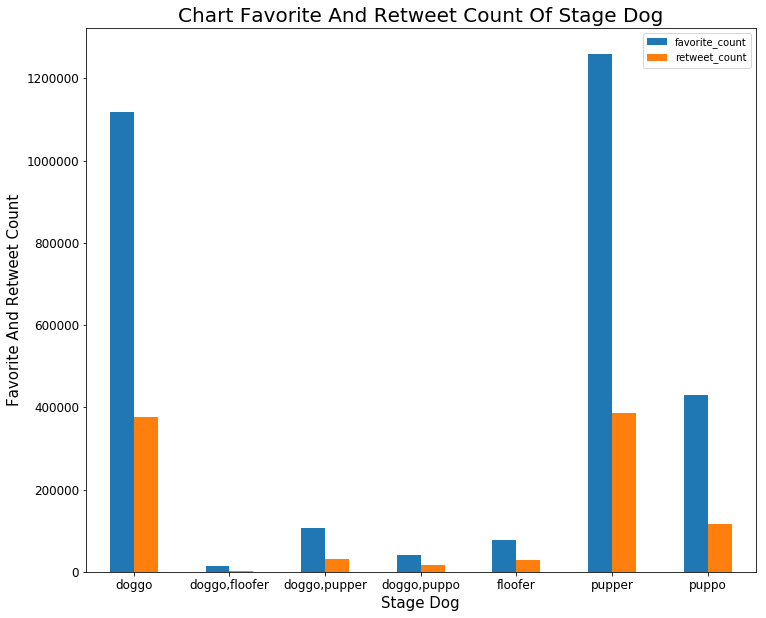

In [79]:
# Create chart bar x = index name, y = sum favorite and retweet
ax = stage_chart.plot(x = 'stage_of_dog', y = ['favorite_count', 'retweet_count'], kind = 'bar', figsize = (12, 10), rot = 0, fontsize = 12);
ax.set_xlabel("Stage Dog", fontsize = 15)
ax.set_ylabel("Favorite And Retweet Count", fontsize = 15)
ax.set_title('Chart Favorite And Retweet Count Of Stage Dog', fontsize = 20);

### 2. The rating rate on a 10 scale: rating_numerator/rating_denominator

**Analysis and Visualization**

In [80]:
# Add column rating is result rating_numerator/rating_denominator
df['rating'] = df['rating_numerator']/df['rating_denominator']
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_of_dog,jpg_url,image_count,favorite_count,favorited,retweet_count,retweeted,full_text,rating
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,2275.0,False,418.0,False,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,0.8
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,112.0,False,39.0,False,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,0.7
2,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,100.0,False,36.0,False,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,0.9
3,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,245.0,False,114.0,False,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,0.6
4,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,88.0,False,36.0,False,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,0.5


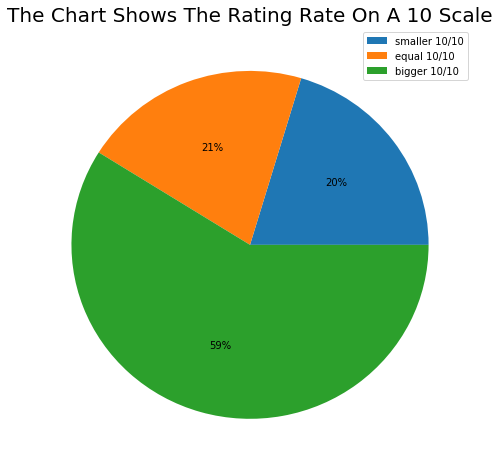

In [81]:
# Create DataFrame contains 3 value on 10/10 scale
df_chart_rating = pd.DataFrame({
    "value":[df[df['rating'] < 1].shape[0],
             df[df['rating'] == 1].shape[0],
             df[df['rating'] > 1].shape[0]
            ]},
    index = ["smaller 10/10", "equal 10/10", "bigger 10/10"]
)
df_chart_rating.plot(kind = 'pie', y = 'value', figsize = (8,8), autopct = '%1.0f%%', labels = None);
plt.ylabel('')
plt.title('The Chart Shows The Rating Rate On A 10 Scale', fontsize = 20);

In [89]:
df_chart_rating

,value
smaller 10/10,424
equal 10/10,431
bigger 10/10,1226


### 3. Time frame for users to use tweets in dataset

**Analysis and Visualization**

In [82]:
# df.timestamp.astype('datetime64[ns]').max() - df.timestamp.astype('datetime64[ns]').min()
# Show time column timestamp
df.timestamp.astype('datetime64[ns]').dt.time

0       22:32:08
1       23:05:30
2       23:21:54
3       00:04:52
4       00:24:50
5       00:30:50
6       00:35:11
7       00:49:46
8       00:55:59
9       01:01:59
10      01:22:45
11      01:52:02
12      01:59:36
13      02:38:37
14      03:22:39
15      03:44:34
16      03:55:04
17      04:02:55
18      14:57:41
19      15:14:19
20      16:11:11
21      16:37:02
22      19:31:45
23      20:01:42
24      20:32:58
25      21:10:36
26      21:54:18
27      23:23:41
28      00:06:54
29      00:24:19
          ...   
2051    16:51:35
2052    23:25:31
2053    20:14:00
2054    23:58:41
2055    16:17:36
2056    00:07:08
2057    16:08:03
2058    00:47:34
2059    03:39:09
2060    16:06:48
2061    16:49:33
2062    00:23:06
2063    16:56:37
2064    00:22:39
2065    00:19:32
2066    17:02:04
2067    00:10:02
2068    01:55:32
2069    16:11:53
2070    00:31:25
2071    15:59:51
2072    16:25:51
2073    00:22:40
2074    16:27:12
2075    00:08:17
2076    16:00:24
2077    15:58:51
2078    00:18:

In [83]:
# Timelines, Time zone 24h
time_1 = time(5)
time_2 = time(22)

In [84]:
# Column time
my_time = df['timestamp'].astype('datetime64[ns]').dt.time

In [85]:
# Compare frame
# If 22h:00 < my_time < 5h:00 is frame early
# If my_time > 22h | my_time < 5h is frame late 
time_early = df[(my_time > time_1) & (my_time < time_2)]
time_late = df[(my_time < time_1) | (my_time > time_2)]
time_early.shape, time_late.shape

((858, 17), (1223, 17))

In [86]:
time_early.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_of_dog,jpg_url,image_count,favorite_count,favorited,retweet_count,retweeted,full_text,rating
18,666268910803644416,2015-11-16 14:57:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,https://twitter.com/dog_rates/status/666268910803644416/photo/1,10.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1.0,97.0,False,38.0,False,Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,1.0
19,666273097616637952,2015-11-16 15:14:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can take selfies 11/10 https://t.co/ws2AMaNwPW,https://twitter.com/dog_rates/status/666273097616637952/photo/1,11.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1.0,151.0,False,66.0,False,Can take selfies 11/10 https://t.co/ws2AMaNwPW,1.1
20,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2.0,an,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,122.0,False,55.0,False,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,0.5
21,666293911632134144,2015-11-16 16:37:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3.0,10.0,a,NaN,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1.0,425.0,False,288.0,False,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,0.3
22,666337882303524864,2015-11-16 19:31:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,https://twitter.com/dog_rates/status/666337882303524864/photo/1,9.0,10.0,an,NaN,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1.0,167.0,False,79.0,False,This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,0.9


In [87]:
time_late.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_of_dog,jpg_url,image_count,favorite_count,favorited,retweet_count,retweeted,full_text,rating
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,2275.0,False,418.0,False,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,0.8
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,112.0,False,39.0,False,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,0.7
2,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,100.0,False,36.0,False,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,0.9
3,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,245.0,False,114.0,False,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,0.6
4,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,88.0,False,36.0,False,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,0.5


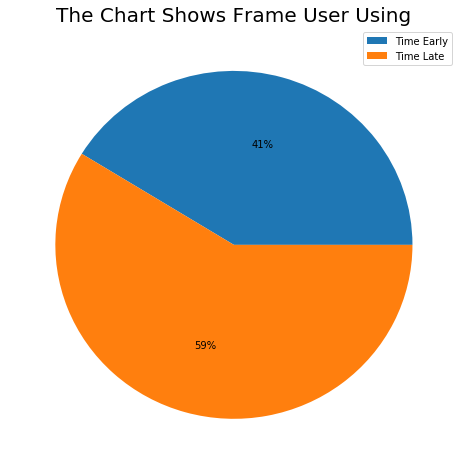

In [88]:
# Create DataFrame contains 2 value is frame rating of user
df_chart_time = pd.DataFrame({
    'value': [time_early.shape[0], time_late.shape[0]]
              },
    index = ['Time Early', 'Time Late']
)
df_chart_time.plot(kind = 'pie', y = 'value', figsize = (8,8), autopct = '%1.0f%%', labels = None);
plt.ylabel('')
plt.title('The Chart Shows Frame User Using', fontsize = 20);